In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import ttk, messagebox
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [2]:
# Read the updated CSV file
data = pd.read_csv("final_dataset.csv")  # Replace with your actual CSV file name
df = pd.DataFrame(data)

In [3]:

# Map categorical "Order_Priority" values to numeric values
order_priority_mapping = {
    "High": 3,
    "Medium": 2,
    "Low": 1,
    "Not Specified": 0,
    "Critical": 0  # You mentioned mapping "Critical" to 0
}

# Map the "Order_Priority" column using the mapping
df["Order_Priority"] = df["Order_Priority"].map(order_priority_mapping)

In [4]:

# Define the features (independent variables)
X = df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

# Define the target variable (dependent variable)
y = df['result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a k-Nearest Neighbors (KNN) classifier
k = 5  # You can adjust the number of neighbors (k) as needed
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)



Confusion Matrix:
[[100  10]
 [  2  34]]


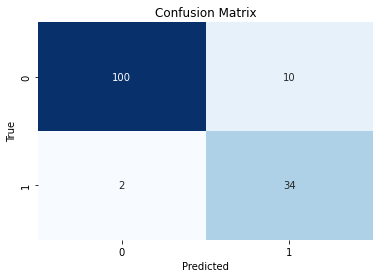

In [5]:
#  you have already defined y_test and y_pred
# Add a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [6]:
# Calculate accuracy for evaluation
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


In [ ]:
def make_prediction(sales, order_quantity, profit, order_priority):
  
    new_data = {
        'Sales': [sales],
        'Order_Quantity': [order_quantity],
        'Profit': [profit],
        'Order_Priority': [order_priority]
    }
    new_df = pd.DataFrame(new_data)

    # Make a prediction for the new data
    predicted_product = model.predict(new_df)

    return predicted_product[0]

def update_prediction(*args):
    try:
        sales = float(entry_sales.get())
        order_quantity = float(entry_order_quantity.get())
        profit = float(entry_profit.get())
        order_priority = int(entry_order_priority.get())

        result = make_prediction(sales, order_quantity, profit, order_priority)

        if result == 1:
            label_prediction.config(text="Predicted Product: Yes", foreground="green")
        else:
            label_prediction.config(text="Predicted Product: No", foreground="red")

        label_accuracy.config(text=f'Model Accuracy: {accuracy:.2%}', foreground="blue")
    except ValueError:
        label_prediction.config(text="Invalid input", foreground="red")
        label_accuracy.config(text='', foreground="black")

#main window
window = tk.Tk()
window.title("Drop-Shipping Prediction using KNN")


#input fields
label_sales = ttk.Label(window, text="Sales:")
entry_sales = ttk.Entry(window)
entry_sales.bind("<KeyRelease>", update_prediction)

label_order_quantity = ttk.Label(window, text="Order Quantity:")
entry_order_quantity = ttk.Entry(window)
entry_order_quantity.bind("<KeyRelease>", update_prediction)

label_profit = ttk.Label(window, text="Profit:")
entry_profit = ttk.Entry(window)
entry_profit.bind("<KeyRelease>", update_prediction)

label_order_priority = ttk.Label(window, text="Order Priority:")
entry_order_priority = ttk.Entry(window)
entry_order_priority.bind("<KeyRelease>", update_prediction)

#labels to display the prediction and accuracy
label_prediction = ttk.Label(window, text="Prediction will be displayed here")
label_accuracy = ttk.Label(window, text="")

# Layout using grid
label_sales.grid(row=0, column=0, padx=10, pady=10, sticky="w")
entry_sales.grid(row=0, column=1, padx=10, pady=10)

label_order_quantity.grid(row=1, column=0, padx=10, pady=10, sticky="w")
entry_order_quantity.grid(row=1, column=1, padx=10, pady=10)

label_profit.grid(row=2, column=0, padx=10, pady=10, sticky="w")
entry_profit.grid(row=2, column=1, padx=10, pady=10)

label_order_priority.grid(row=3, column=0, padx=10, pady=10, sticky="w")
entry_order_priority.grid(row=3, column=1, padx=10, pady=10)

label_prediction.grid(row=4, column=0, columnspan=2, pady=10)
label_accuracy.grid(row=5, column=0, columnspan=2, pady=10)


window.mainloop()

In [ ]:
# Create a new row of data for prediction
new_data = {
    'Sales': [1500],
    'Order_Quantity': [100],
    'Profit': [500],
    'Order_Priority': [2]  
}
new_df = pd.DataFrame(new_data)

# Make a prediction for the new data
predicted_product = model.predict(new_df)

if predicted_product[0] == 1:
    print('Predicted Product: Yes')
else:
    print('Predicted Product: No')

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

# Load the trained KNN model
k = 5  
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)  

# Read the test dataset
test_data = pd.read_csv("test.csv")  
test_df = pd.DataFrame(test_data)

# Map categorical "Order_Priority" values to numeric values
test_df["Order_Priority"] = test_df["Order_Priority"].map(order_priority_mapping)

# features (independent variables) for the test dataset
X_test = test_df[['Sales', 'Order_Quantity', 'Profit', 'Order_Priority']]

# predictions on the test dataset
test_predictions = model.predict(X_test)

# Map binary predictions to "Yes" or "No"
test_predictions = ["Yes" if pred == 1 else "No" for pred in test_predictions]

# Add the "Result" column to the test dataset
test_df["Result"] = test_predictions

# updated test dataset with the "Result" column
test_df.to_csv("test_with_results_knn.csv")  # Replace with the desired output file name
